# Investigating Properties of Coherent States in Simple Harmonic Oscillator

In [1]:
import vpython as vp
import matplotlib.pyplot as pl
import numpy as np
from vpython import rate 
vp.canvas()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
def SetArrowFromCN( cn, a):
    """
    SetArrowWithCN takes a complex number  cn  and an arrow object  a .
    It sets the  y  and  z  components of the arrow s axis to the real 
    and imaginary parts of the given complex number. 
    
    Just like Computing Project 1, except y and z for real/imag.
    """
    a.axis.y = cn.real
    a.axis.z = cn.imag
    a.axis.x = 0.0

In [5]:
vp.canvas()
gd = vp.graph(xtitle="t", ytitle="Expectation", width=400, height=300)
gr = vp.gcurve(color = vp.color.black)

NA=80                          # how many arrows?
a=15.0                         # range of x is -a/2 to a/2 in units 
                               # of $\sqrt{\hbar/m\omega}$
x = np.linspace(-a/2, a/2, NA)    # NA locations from -a/2 to a/2

NHs = 20
hs = np.zeros((NHs,NA), np.double)    # the hermite polynomials, an NHs x NA array
coefs = np.zeros(NHs,np.double)      # the coherent state coefficients, an NHs x 1 array
psis = np.zeros((NHs,NA), np.double) # the stationary states, an NHs x NA array

alpha = np.sqrt(10)               # <n> = 10.0

hs[0] = 0*x + 1.0              # zeroth Hermite Polynomial, H0
hs[1] = 2*x                    # first Hermite Polynomial, H1

#
# Compute the first NHs Hermite Polynomials,
# use recurrence relation to get the rest of the Hn(x)
#
# (see e.g., http://en.wikipedia.org/wiki/Hermite_polynomials#Recursion_relation)
#

for n in range(1,NHs-1):
    hs[n+1]=2*x*hs[n] - 2*n*hs[n-1]

#
# Use the coherent state coefficient relation to get the c[n]s.
# avoid overflow by computing them in a loop. Don't worry about 
# the overall factor of c[0] since we'll renormalize our discrete 
# psi array later anyway.
#

coefs[0]=1.0 * np.exp(-alpha**2)
for i in range(1,NHs):
    coefs[i]=coefs[i-1]*alpha/np.sqrt(i)

#
# Get the stationary states using the hs array and compute the 
# normalization factor in a loop to avoid overflow
#

normFactor = 1.0/np.pi**0.25
psis[0] = np.exp(-x**2/2)
for i in range(1,NHs):
    normFactor = normFactor/np.sqrt(2.0*i)
    psis[i]=normFactor*hs[i]* np.exp(-x**2/2)
    
#
# Now do the sum to compute the initial wavefunction
#

psi = np.zeros(len(x),complex)
for m in range(NHs):
    psi += coefs[m]*psis[m]

#
# Normalize!
#

psi=psi/np.sqrt((abs(psi)**2).sum())

#
# build the arrows. Scale them on the screen by a factor 
# of 3 so they look nice.
#

alist = []
for i in range(NA):
    alist.append(vp.arrow(pos=vp.vec(x[i],0,0), color= vp.color.red))
    SetArrowFromCN(3*psi[i],alist[i])

vp.scene.autoscale = False
t = 0.0
dt = 2*np.pi/1000.0

rate(100)

#
# After this.. create the "time loop" that animates the wavefunction
# and computes the values for <x> and graphs them. 
#


<IPython.core.display.Javascript object>

![Coherent.png](Coherent.png)
![Expectation.png](Expectation.png)

In [6]:
def timeloop(t):
    psi = np.zeros(len(x),complex)
    for m in range(NHs):
        psi += coefs[m] * psis[m]*np.exp(-1j*(0.5 + m)*t)
    psi = psi/np.sqrt((abs(psi)**2).sum()) 
    for i in range(NA):
        SetArrowFromCN(3*psi[i],alist[i])
    expect = (x*(abs(psi)**2)).sum()
    gr.plot(pos=(t, expect))
    
vp.scene.autoscale = False
t = 0.0
dt = 2*np.pi/1000.0
while t < 4*np.pi:
    rate(100)
    timeloop(t)
    t+=dt

# Questions

# 1.

$$ \psi_{\alpha} = c_{0} \sum_{n = 0}^{\infty} \frac{\alpha}{\sqrt{n!}} \psi_{n}$$
$$ 1 = c^2_{0} \sum_{n = 0}^{\infty} \frac{\alpha^{2n}}{n!} $$
$$ 1 = c^2_{0} e^{\alpha^{2}} $$
$$ e^{-\alpha^2} = c^2_{0} $$
$$ c_{0} = e^{\frac{-\alpha^2}{2}} $$

# 2.

$$ \langle n \rangle = e^{\frac{-\alpha^2}{2}2} \sum_{n = 0}^{\infty} \frac{\alpha^{2n}}{n!}n $$
$$ \langle n \rangle = e^{-\alpha^2} \lvert \alpha^{2}\rvert \sum_{n = 1}^{\infty} \frac{\alpha^{2n-2}}{(n-1)!} \frac {n}{n} $$
$$ \langle n \rangle = e^{-\alpha^2} \lvert \alpha^{2}\rvert \sum_{n = 1}^{\infty} \frac{\alpha^{2n-2}}{(n-1)!} $$
$$ \langle n \rangle = e^{-\alpha^2} \lvert \alpha^{2}\rvert \sum_{n = 0}^{\infty} \frac{\alpha^{2n}}{n!} $$
$$ \langle n \rangle = e^{-\alpha^2} \lvert \alpha^{2}\rvert e^{\alpha^2} $$
$$ \langle n \rangle = \lvert \alpha^{2}\rvert  $$

# 3.

$$ E_{n} = \hbar \omega ( n + \frac{1}{2}) $$
$$ \langle E \rangle = \sum_{n = 1}^{\infty} P_{n} E_{n} $$
$$ \hbar \omega \langle n \rangle + \frac{\hbar \omega}{2} $$
$$ \frac{kx^2}{2} = \hbar \omega \alpha ^ 2 $$ 
$$ x =  \sqrt{\frac {2 \hbar \omega}{k}} \alpha$$
$$ x =  \sqrt{\frac {2 \hbar \omega}{m \omega}} \alpha$$
$$ x =  \sqrt{\frac {2 \hbar}{m}} \alpha$$

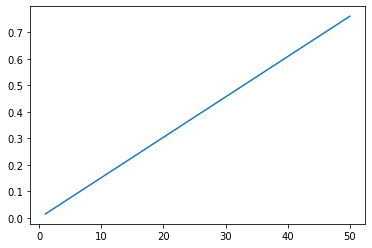

In [7]:
hbar = 1.0545718e-34 
m = 9.10938356e-31
alpha = np.linspace(1, 50, 100)
x = np.sqrt((2*hbar)/m) * alpha
pl.plot(alpha, x) 